# HIRING MODEL PART 1 - INFORMATION

Hiring Model ipums@umn.edu Thu, Nov 28, 12:31 PM (2 days ago) to me Your Higher Ed extract is ready. To retrieve your data, codebook, and command files, go to the link below. Account: naeemahaz@gmail.com Extract: 2 Link: https://highered.ipums.org/highered-action/extract_requests/download Publications and research reports based on the Higher Ed database must cite it appropriately. The citation should include the following: Minnesota Population Center. IPUMS Higher Ed: Version 1.0 [dataset]. Minneapolis, MN: University of Minnesota, 2016. https://doi.org/10.18128/D100.V1.0 For policy briefs or articles in the popular press that use the Higher Ed database, we recommend that you cite the use of Higher Ed data as follows: Higher Ed, University of Minnesota, www.ipums.org Thank you for your support. Sincerely, The Higher Ed Team

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import csv
from bokeh.io import output_file, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource, CategoricalColorMapper, Div
from bokeh.layouts import gridplot, column
from bokeh.io import output_file, output_notebook
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import row, column, gridplot
from bokeh.models.widgets import Tabs, Panel
from bokeh.plotting import figure, show
from bokeh.io import output_file
from bokeh.models import ColumnDataSource
import seaborn as sns
import matplotlib.pyplot as plt
import pydotplus as pydot
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 500)

In [2]:
data = pd.read_csv('alldata.csv')

C:\Users\Naeemah\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.sample(4)

,REFID,AGE,GENDER,MINORITY,RACE,BIRTH_PLACE,US_CITIZENSHIP,US_CITIZEN_TYPE,TOTAL_CHILDREN,HOURS_WORKED,SALARY,HAVE_HEALTH_CARE,HAVE_PENSION,HAVE_PROFIT_SHARE,HAVE_VACATION,PRINCIPAL_POSITION_RELATED_HIGH_DEGREE,PRINCIPAL_POSITION,PRINCIPAL_MAJOR_GROUP,EMPLOYER_SECTOR,EMPLOYER_SIZE,WORK_ACTIVITY,WORK_ACTIVITY_SUM,WORK_ACTIVITY_SECOND,WORK_ACTIVITY_SCEOND_SUM,COMPUTER,DEVELOPMENT_AND_DESIGN,MANAGEMENT_SALES,RESEARCH_AND_DEVELOPMENT,RESEARCH_DEVE_TEACHING,ACTIVITY_RESEARCH,ACTIVITY_TEACHING,WORK_DEVELOPMENT,WORK_DESIGN,WORK_EMPLOYEE_RELATIONS,WORK_MANAGEMENT_ADMIN,WORK_OTHER,WORK_PRODUCTION,WORK_QUALITY_MANAGEMENT,WORK_SALES_MARKETING,WORK_PROFESSIONAL_SERVICES,WORK_TEACHING,WORK_FINANCE,WORK_APPLIED_RESEARCH,WORK_RESEARCH,WORK_COMPUTER_APPLICATIONS,SUPERVISORY_WORK,MEMEBERSHIP,ATTENED_PROFESSIONAL_MEET,WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON,WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON,WORK_OUTSIDE_DEGREE_FOR_CAREER_CHANGE,WORK_OUTSIDE_DEGREE_FOR_WORK_COND,WORK_OUTSIDE_DEGREE_FOR_FAMILY,WORK_OUTSIDE_DEGREE_FOR_LOC,WORK_OUTSIDE_DEGREE_FOR_NOT_AVAIL,WORK_OUTSIDE_DEGREE_FOR_OTHER,WORK_OUTSIDE_DEGREE_FOR_PAY_PROMOTE,SATISFACTION_JOB,SATISFACTION_JOB_ADVANCE,SATISFACTION_JOB_BENEFITS,SATISFACTION_JOB_CHALLENGE,SATISFACTION_JOB_INDEP,SATISFACTION_JOB_LOC,SATISFACTION_JOB_RESP,SATISFACTION_JOB_SALARY,SATISFACTION_JOB_SECURITY,SATISFACTION_JOB_CONTRIB_SOCIETY,ATTEND_TRAINING_WORK_RELATE,ATTEND_TRAINING,ATTEND_TRAINING_CHANGE_FIELD,ATTEND_TRAINING_BY_EMPLOYER,ATTEND_TRAINING_CERT,ATTEND_TRAINING_INCREASE_ADV_CUR,ATTEND_TRAINING_OTHER,ATTEND_TRAINING_PERSONAL,ATTEND_TRAINING_ACQUIRE_SKILL,JOB_REQUIRED_TECH_NATURAL_SCIENCES,JOB_REQUIRED_TECH_OTHER,JOB_REQUIRED_TECH_SOCIAL_SCIENCES,RECENT_DEGREE,FIELD_MAJOR_RECENT_DEGREE,FIELD_MAJOR_GROUP_RECENT_DEGREE,REASON_EDUCATION_ADVANCE_OPPORTUNITIES,REASON_EDUCATION_BEFORE_CAREER,REASON_EDUCATION_CHANGE_CAREER,REASON_EDUCATION_PERSONAL,REASON_EDUCATION_CERIFICATION,REASON_EDUCATION_BY_EMPLOYER,REASON_EDUCATION_ADVANCE_SKILL_IN_FIELD,REASON_EDUCATION_PAID_BY_EMPLOYER
39380,E11489168,30,Male,No,White,Not in the US,Yes,By naturalization,None,36 - 40 hours,"$82,000.00",Yes,Yes,Yes,Yes,Closely related,Civil engineers,Engineers,Business or industry,100-499 employees,Development,Research and Development,"Design of equipment, processes, structures, mo...",Computer Applications,Yes,Yes,No,Yes,Yes,No,No,Yes,Yes,No,Yes,No,No,No,No,No,No,No,Yes,No,Yes,Yes,2 memberships,Yes,No,No,No,No,No,No,No,No,No,Somewhat satisfied,Somewhat satisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat dissatisfied,Very satisfied,Somewhat satisfied,Somewhat satisfied,Very dissatisfied,Somewhat dissatisfied,Yes,For certification,No,No,Yes,No,No,No,No,Yes,No,No,Bachelor,Civil engineering,Engineering,No,No,No,No,No,No,No,No
1603,A06316426,30,Male,Yes,Under-represented minorities,United States,Yes,Born in US or US territories,None,36 - 40 hours,"$93,000.00",Yes,Yes,No,Yes,Somewhat related,Other Non-science and engineering occupations,Non-science and engineering occupations,Government,25000+ employees,Management and Administration,Management and Administration,Quality or productivity management,Management and Administration,No,No,Yes,No,No,No,No,No,No,Yes,Yes,No,Yes,Yes,No,No,No,Yes,Yes,Yes,No,Yes,1 membership,Yes,No,No,No,No,No,No,No,No,No,Somewhat dissatisfied,Very dissatisfied,Very satisfied,Somewhat dissatisfied,Somewhat dissatisfied,Somewhat satisfied,Somewhat satisfied,Somewhat satisfied,Very satisfied,Somewhat satisfied,Yes,"To increase opportunities for promotion, advan...",Yes,No,No,Yes,No,Yes,Yes,No,No,No,Master,Management and administration,Non-science and engineering fields,No,No,No,No,No,No,No,No
37003,E11438629,69,Male,No,Asian,Not in the US,Yes,By naturalization,None,Greater than 40 hours,"$65,000.00",Yes,Yes,Yes,Yes,Closely related,Mechanical engineers,Engineers,Business or industry,25000+ employees,Quality or productivity management,Management and Administration,Teaching,Teaching,No,No,Yes,No,Yes,No,Yes,Yes,No,No,No,No,No,Yes

In [4]:
data['AGE'] = pd.to_numeric(data['AGE'])

In [5]:
bins = [20, 30,  40,  50,  60,  70,  80]
data['AGE_BINS'] = pd.cut(data['AGE'], bins)

In [6]:
data['SALARY_NEW'] = data[' SALARY '].str.replace('$', '')

In [7]:
data['SALARY_NEW'] = data['SALARY_NEW'].str.replace(',', '')

In [8]:
data['SALARY'] = data['SALARY_NEW'].str.replace(' -   ', '')

In [9]:
data = data.drop('SALARY_NEW', axis=1)

In [10]:
data['SALARY'] = pd.to_numeric(data['SALARY'], errors='coerce')

In [11]:
bins = [0, 5000, 10000, 20000,  30000,  40000,  50000,  60000,  70000,  80000, 90000, 100000, 200000]
data['SALARY_BINS'] = pd.cut(data['SALARY'], bins)

In [12]:
data = data.drop('SALARY', axis=1)

In [13]:
data = data.drop(' SALARY ', axis=1)

In [14]:
data.pivot_table(index=['GENDER','SALARY_BINS'], values=['REFID'], aggfunc='count')

REFID
GENDER SALARY_BINS            
Female (0, 5000]           833
       (5000, 10000]       851
       (10000, 20000]     2067
       (20000, 30000]     2660
       (30000, 40000]     3241
       (40000, 50000]     3803
       (50000, 60000]     3375
       (60000, 70000]     2552
       (70000, 80000]     2220
       (80000, 90000]     1554
       (90000, 100000]    1296
       (100000, 200000]   2649
Male   (0, 5000]           436
       (5000, 10000]       508
       (10000, 20000]     1700
       (20000, 30000]     2013
       (30000, 40000]     2270
       (40000, 50000]     3038
       (50000, 60000]     3364
       (60000, 70000]     3442
       (70000, 80000]     3611
       (80000, 90000]     2927
       (90000, 100000]    2884
       (100000, 200000]   8634

In [15]:
data.pivot_table(index=['GENDER','RACE'], values=['REFID'], aggfunc='count')

REFID
GENDER RACE                               
Female Asian                          4358
       Under-represented minorities   7552
       White                         15414
Male   Asian                          6420
       Under-represented minorities   6826
       White                         21803

In [16]:
data.pivot_table(index=['GENDER','RACE','RECENT_DEGREE'], values=['REFID'], aggfunc='count')

REFID
GENDER RACE                         RECENT_DEGREE       
Female Asian                        Bachelor        2043
                                    Doctorate        163
                                    Master          1676
                                    No Degree        219
                                    Professional     257
       Under-represented minorities Bachelor        4242
                                    Doctorate        162
                                    Master          2776
                                    No Degree         79
                                    Professional     293
       White                        Bachelor        7492
                                    Doctorate        466
                                    Master          6612
                                    No Degree        159
                                    Professional     685
Male   Asian                        Bachelor        2677
                                    Doctorate        361
                                    Master          2686
                                    No Degree        464
                                    Professional     232
       Under-represented minorities Bachelor        4116
                                    Doctorate        162
                                    Master          2087
                                    No Degree        152
                                    Professional     309
       White                        Bachelor       12771
                                    Doctorate        651
                                    Master          6891
                                    No Degree        356
                                    Professional    1134

In [17]:
data.pivot_table(index=['WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON','WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON'], values=['REFID'], aggfunc='count')

REFID
WORK_OUTSIDE_DEGREE_FOR_FIRST_REASON       WORK_OUTSIDE_DEGREE_FOR_SECOND_REASON            
Change in career or professional interests Family-related reasons                         87
                                           Job in highest degree field not available     119
                                           Job location                                  139
                                           No second most important reason               316
                                           Other reason for not working                   22
                                           Pay, promotion opportunities                  662
                                           Working conditions                            320
Family-related reasons                     Change in career or professional interests     79
                                           Job in highest degree field not available      64
                                           Job location                                  171
                                           No second most important reason               114
                                           Other reason for not working                   13
                                           Pay, promotion opportunities                  186
                                           Working conditions                            208
Job in highest degree field not available  Change in career or professional interests    156
                                           Family-related reasons                        155
                                           Job location                                  304
                                           No second most important reason               553
                                           Other reason for not working                   43
                                           Pay, promotion opportunities                  690
                                           Working conditions                            148
Job location                               Change in career or professional interests     61
                                           Family-related reasons                         66
                                           Job in highest degree field not available      75
                                           No second most important reason                61
                                           Other reason for not working                    7
                                           Pay, promotion opportunities                  171
                                           Working conditions                            121
No                                         No                                          53496
Other reason for not working               Change in career or professional interests     36
                                           Family-related reasons                         17
                                           Job in highest degree field not available      43
                                           Job location                                   36
                                           No second most important reason               498
                                           Pay, promotion opportunities                   61
                                           Working conditions                             62
Pay, promotion opportunities               Change in career or professional interests    359
                                           Family-related reasons                        129
                                           Job in highest degree field not available     252
                                           Job location                                  397
                                           No second most important reason               353
                                           Other reason for not working                 

In [18]:
data.pivot_table(index=['GENDER','BIRTH_PLACE','US_CITIZENSHIP','US_CITIZEN_TYPE'], values=['REFID'], aggfunc='count')

REFID
GENDER BIRTH_PLACE   US_CITIZENSHIP US_CITIZEN_TYPE                       
Female Not in the US No             None                              2506
                     Yes            Born abroad of American parents    410
                                    Born in US or US territories         9
                                    By naturalization                 3269
       United States No             None                                 7
                     Yes            Born in US or US territories     21118
                                    By naturalization                    5
Male   Not in the US No             None                              4652
                     Yes            Born abroad of American parents    480
                                    Born in US or US territories         6
                                    By naturalization                 4704
       United States No             None                                 4
                     Yes            Born abroad of American parents      1
                                    Born in US or US territories     25192
                                    By naturalization                   10

In [19]:
data.pivot_table(index=['RECENT_DEGREE','PRINCIPAL_MAJOR_GROUP'], values=['REFID'], aggfunc='count')

REFID
RECENT_DEGREE PRINCIPAL_MAJOR_GROUP                                    
Bachelor      Biological, agricultural and other life scientists   1315
              Computer and mathematical scientists                 4323
              Engineers                                            5783
              Non-science and engineering occupations             12657
              Physical and related scientists                      1278
              Science and engineering related occupations          7397
              Social and related scientists                         588
Doctorate     Biological, agricultural and other life scientists    415
              Computer and mathematical scientists                  169
              Engineers                                             206
              Non-science and engineering occupations               438
              Physical and related scientists                       209
              Science and engineering related occupations           269
              Social and related scientists                         259
Master        Biological, agricultural and other life scientists   1026
              Computer and mathematical scientists                 3013
              Engineers                                            3270
              Non-science and engineering occupations              7892
              Physical and related scientists                       826
              Science and engineering related occupations          5308
              Social and related scientists                        1393
No Degree     Biological, agricultural and other life scientists    238
              Computer and mathematical scientists                  166
              Engineers                                             265
              Non-science and engineering occupations               192
              Physical and related scientists                       183
              Science and engineering related occupations           101
              Social and related scientists                         284
Professional  Biological, agricultural and other life scientists     50
              Computer and mathematical scientists                   21
              Engineers                                               8
              Non-science and engineering occupations              1278
              Physical and related scientists                         3
              Science and engineering related occupations          1449
              Social and related scientists                         101

In [20]:
data.pivot_table(index=['GENDER','RACE','RECENT_DEGREE'], values=['REFID'], aggfunc='count')

REFID
GENDER RACE                         RECENT_DEGREE       
Female Asian                        Bachelor        2043
                                    Doctorate        163
                                    Master          1676
                                    No Degree        219
                                    Professional     257
       Under-represented minorities Bachelor        4242
                                    Doctorate        162
                                    Master          2776
                                    No Degree         79
                                    Professional     293
       White                        Bachelor        7492
                                    Doctorate        466
                                    Master          6612
                                    No Degree        159
                                    Professional     685
Male   Asian                        Bachelor        2677
                                    Doctorate        361
                                    Master          2686
                                    No Degree        464
                                    Professional     232
       Under-represented minorities Bachelor        4116
                                    Doctorate        162
                                    Master          2087
                                    No Degree        152
                                    Professional     309
       White                        Bachelor       12771
                                    Doctorate        651
                                    Master          6891
                                    No Degree        356
                                    Professional    1134

In [21]:
data.pivot_table(index=['RECENT_DEGREE','SATISFACTION_JOB'], values=['REFID'], aggfunc='count')

REFID
RECENT_DEGREE SATISFACTION_JOB            
Bachelor      Somewhat dissatisfied   3152
              Somewhat satisfied     15695
              Very dissatisfied       1021
              Very satisfied         13473
Doctorate     Somewhat dissatisfied    169
              Somewhat satisfied       854
              Very dissatisfied         24
              Very satisfied           918
Master        Somewhat dissatisfied   1807
              Somewhat satisfied     10400
              Very dissatisfied        487
              Very satisfied         10034
No Degree     Somewhat dissatisfied    135
              Somewhat satisfied       763
              Very dissatisfied         30
              Very satisfied           501
Professional  Somewhat dissatisfied    190
              Somewhat satisfied      1002
              Very dissatisfied         63
              Very satisfied          1655

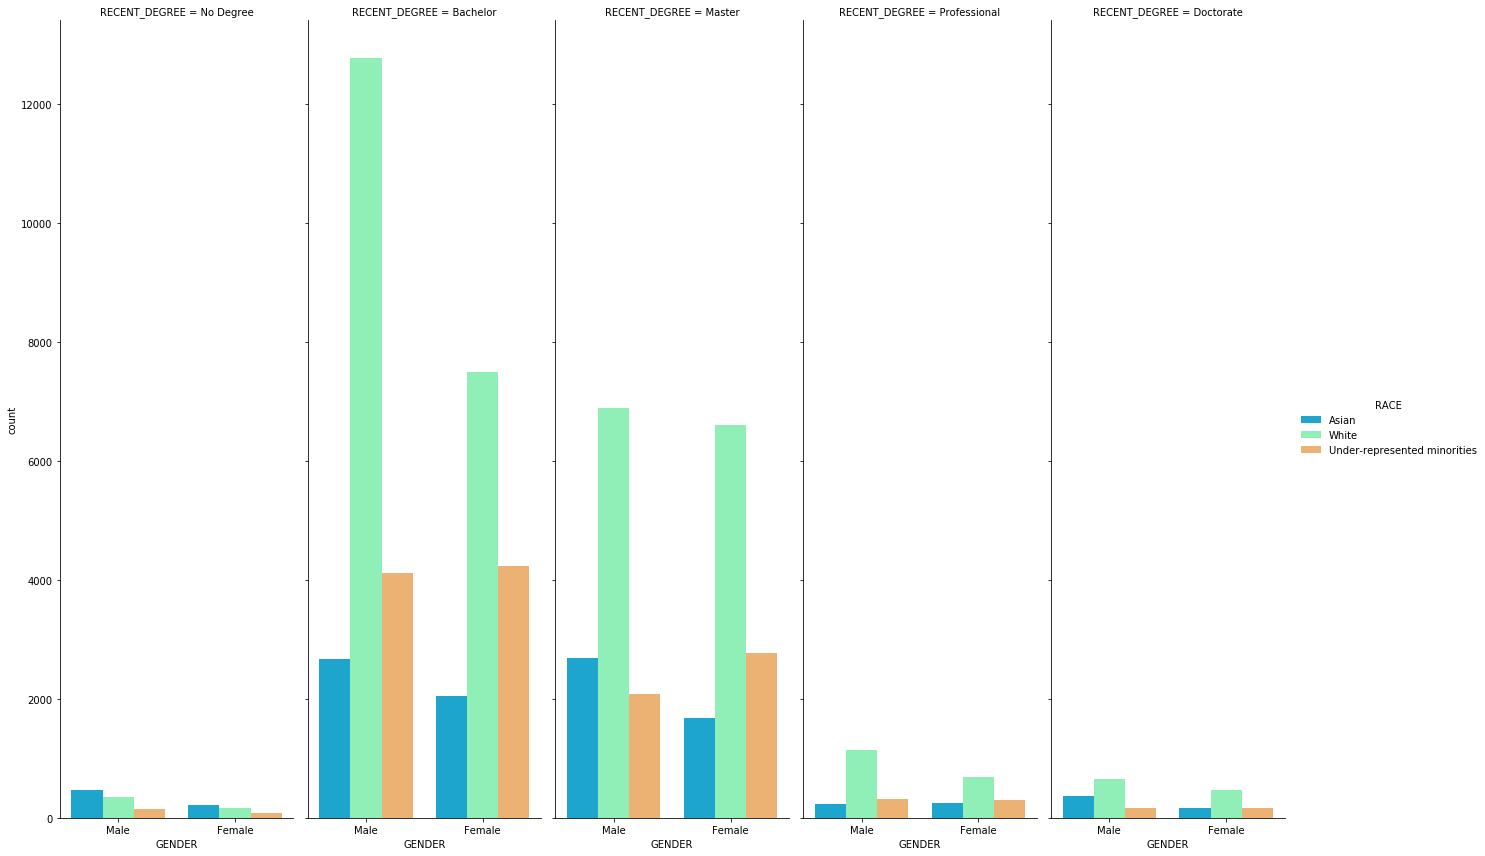

In [22]:
sns.catplot(x="GENDER", hue="RACE", col="RECENT_DEGREE",
               data=data, kind="count", palette='rainbow',
               height=12, aspect=.3)

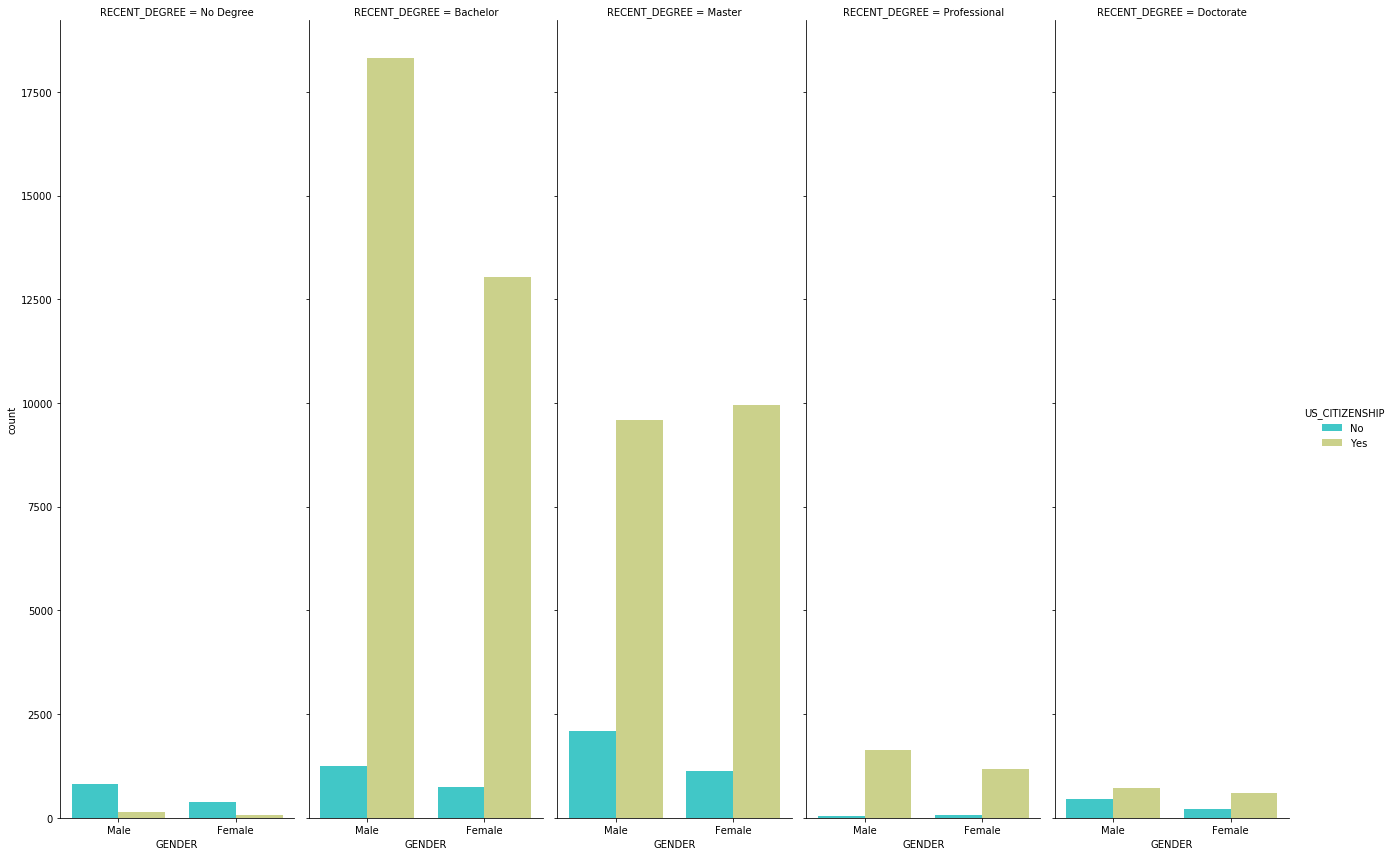

In [23]:
sns.catplot(x="GENDER", hue="US_CITIZENSHIP", col="RECENT_DEGREE",
               data=data, kind="count", palette='rainbow',
               height=12, aspect=.3)

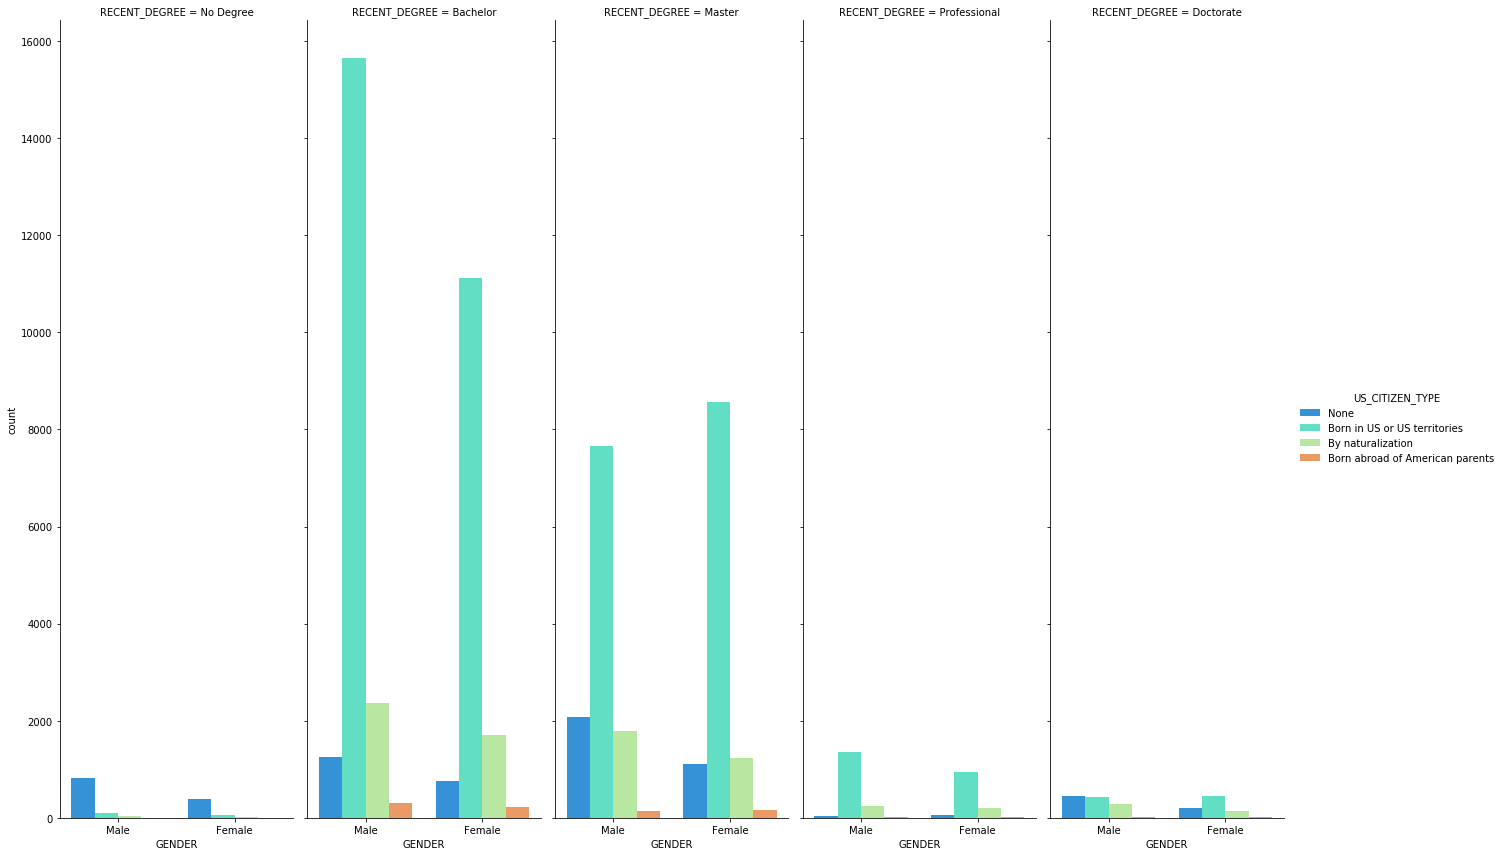

In [24]:
sns.catplot(x="GENDER", hue="US_CITIZEN_TYPE", col="RECENT_DEGREE",
               data=data, kind="count", palette='rainbow',
               height=12, aspect=.3)

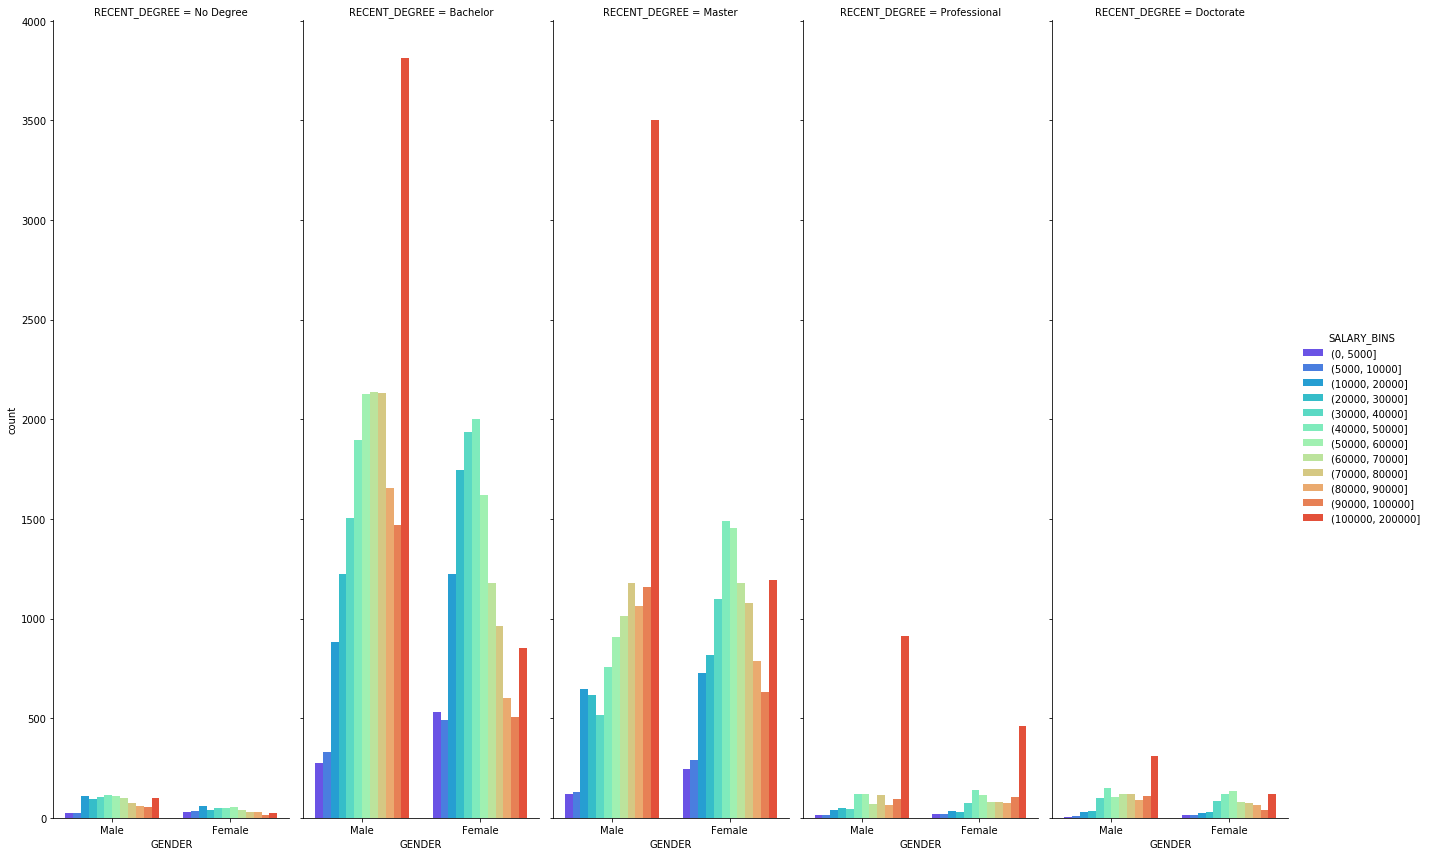

In [25]:
sns.catplot(x="GENDER", hue="SALARY_BINS", col="RECENT_DEGREE",
               data=data, kind="count", palette='rainbow',
               height=12, aspect=.3)

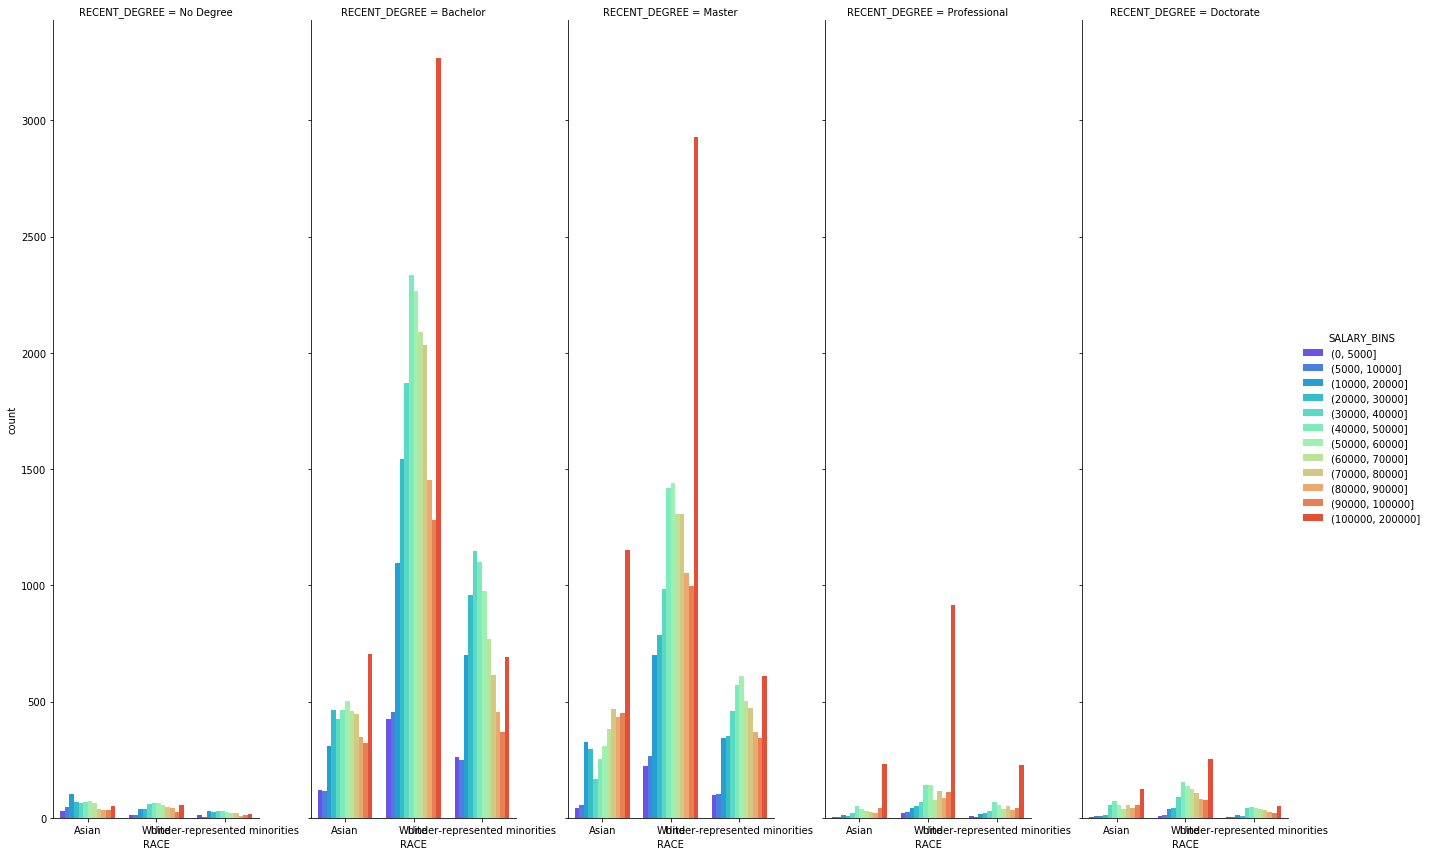

In [26]:
sns.catplot(x="RACE", hue="SALARY_BINS", col="RECENT_DEGREE",
               data=data, kind="count", palette='rainbow',
               height=12, aspect=.3)

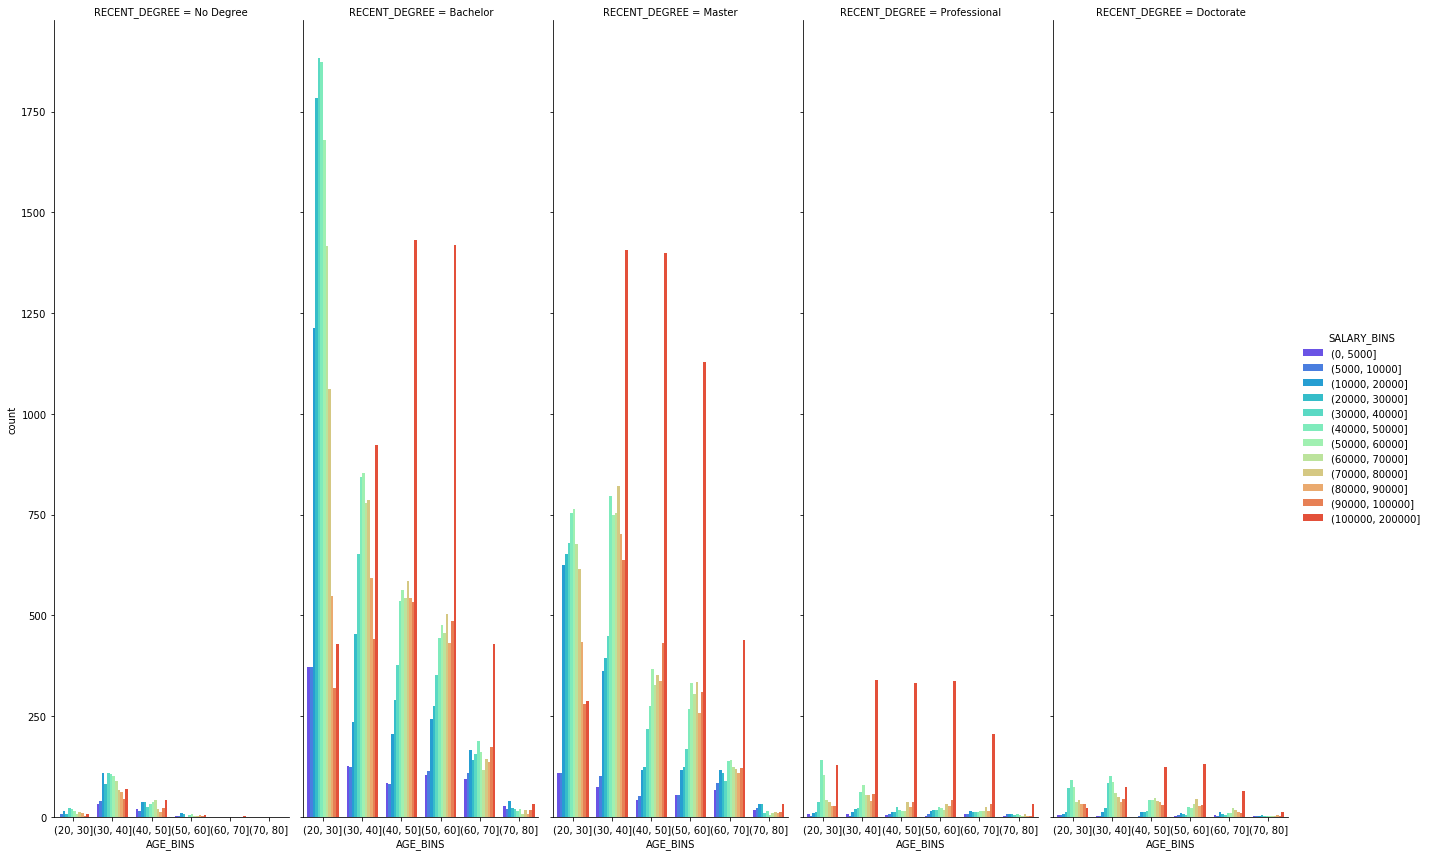

In [27]:
sns.catplot(x="AGE_BINS", hue="SALARY_BINS", col="RECENT_DEGREE",
               data=data, kind="count", palette='rainbow',
               height=12, aspect=.3)

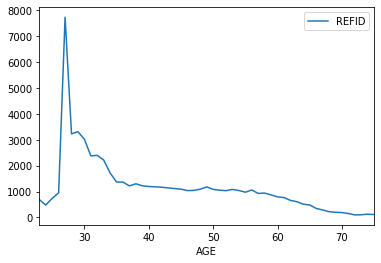

In [28]:
data.pivot_table(index=['AGE'], values=['REFID'], aggfunc='count').plot()

In [29]:
data.pivot_table(index=['US_CITIZEN_TYPE'], values=['REFID'], aggfunc='count')

,REFID
US_CITIZEN_TYPE,
Born abroad of American parents,891
Born in US or US territories,46325
By naturalization,7988
None,7169


In [30]:
data.pivot_table(index=['US_CITIZENSHIP','GENDER','RACE'], values=['REFID'], aggfunc='count')

REFID
US_CITIZENSHIP GENDER RACE                               
No             Female Asian                          1470
                      Under-represented minorities    423
                      White                           620
               Male   Asian                          2656
                      Under-represented minorities    776
                      White                          1224
Yes            Female Asian                          2888
                      Under-represented minorities   7129
                      White                         14794
               Male   Asian                          3764
                      Under-represented minorities   6050
                      White                         20579

In [31]:
data.pivot_table(index=['GENDER','RACE'], values=['REFID'], aggfunc='count')

REFID
GENDER RACE                               
Female Asian                          4358
       Under-represented minorities   7552
       White                         15414
Male   Asian                          6420
       Under-represented minorities   6826
       White                         21803

In [32]:
data.pivot_table(index=['US_CITIZEN_TYPE','TOTAL_CHILDREN'], values=['REFID'], aggfunc='count')

REFID
US_CITIZEN_TYPE                 TOTAL_CHILDREN             
Born abroad of American parents None                    512
                                One child               157
                                Two or more children    222
Born in US or US territories    None                  27843
                                One child              7656
                                Two or more children  10826
By naturalization               None                   3891
                                One child              1580
                                Two or more children   2517
None                            None                   4301
                                One child              1441
                                Two or more children   1427

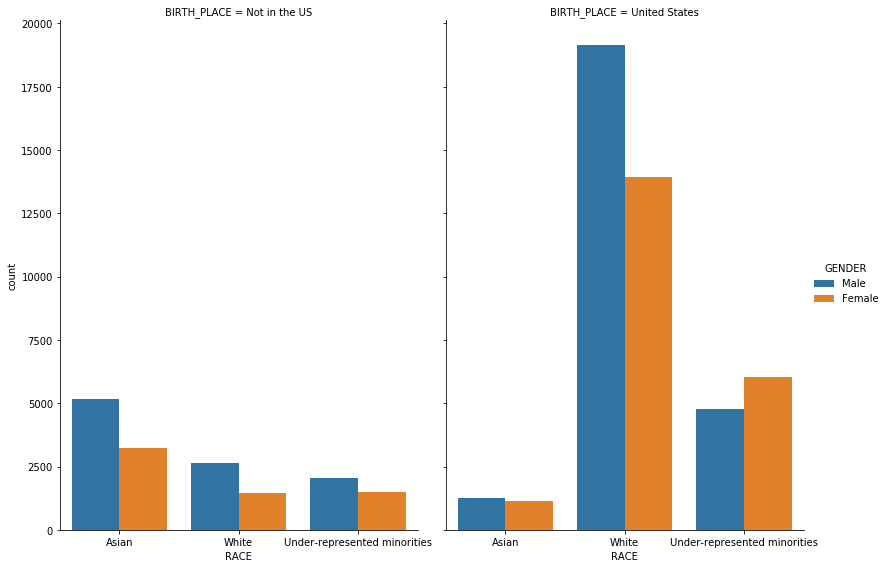

In [33]:
sns.catplot(x="RACE", hue="GENDER", col="BIRTH_PLACE",
               data=data, kind="count",
               height=8, aspect=.7)

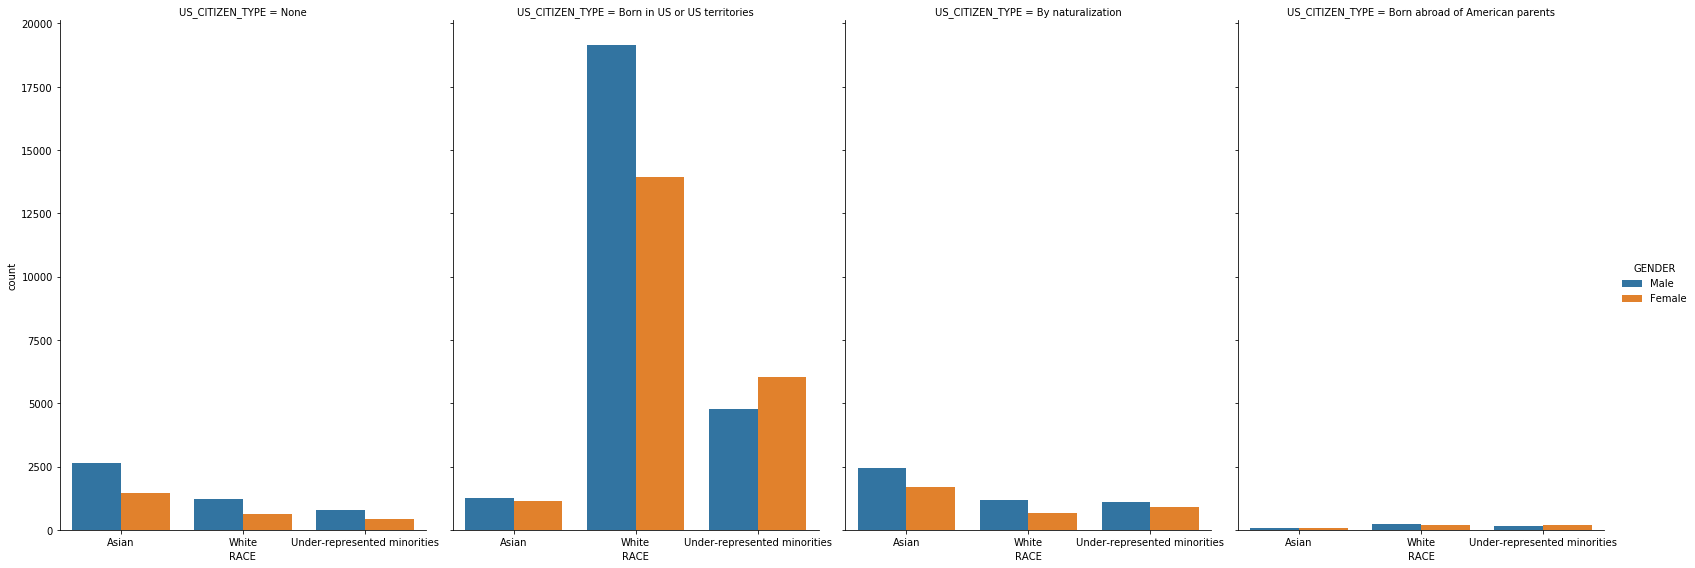

In [34]:
sns.catplot(x="RACE", hue="GENDER", col="US_CITIZEN_TYPE",
               data=data, kind="count",
               height=8, aspect=.7)

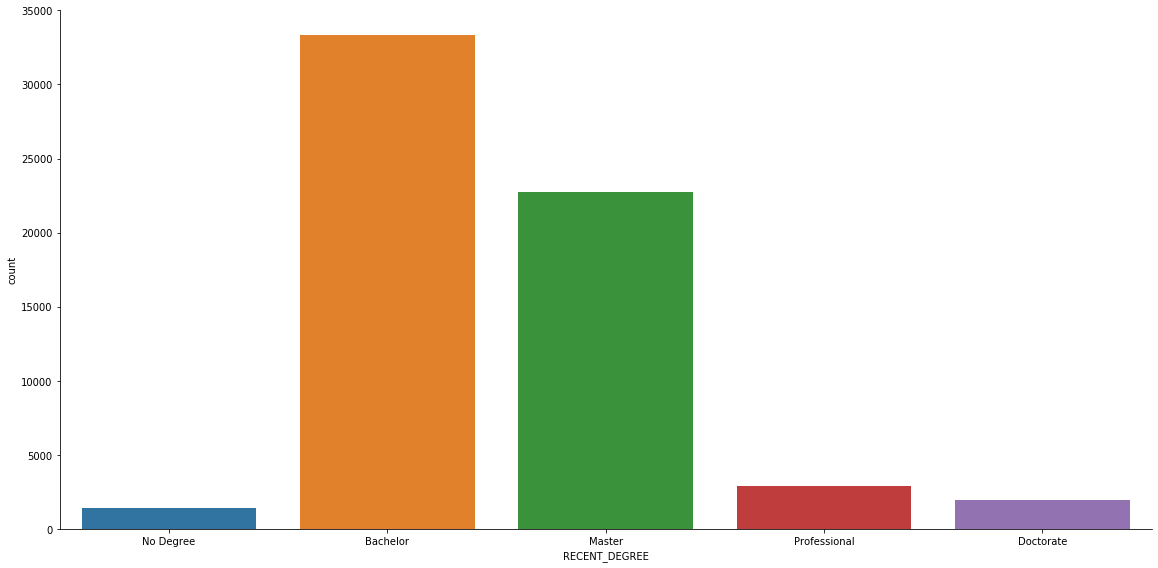

In [35]:
sns.catplot(x="RECENT_DEGREE",
               data=data, kind="count",
               height=8, aspect=2)

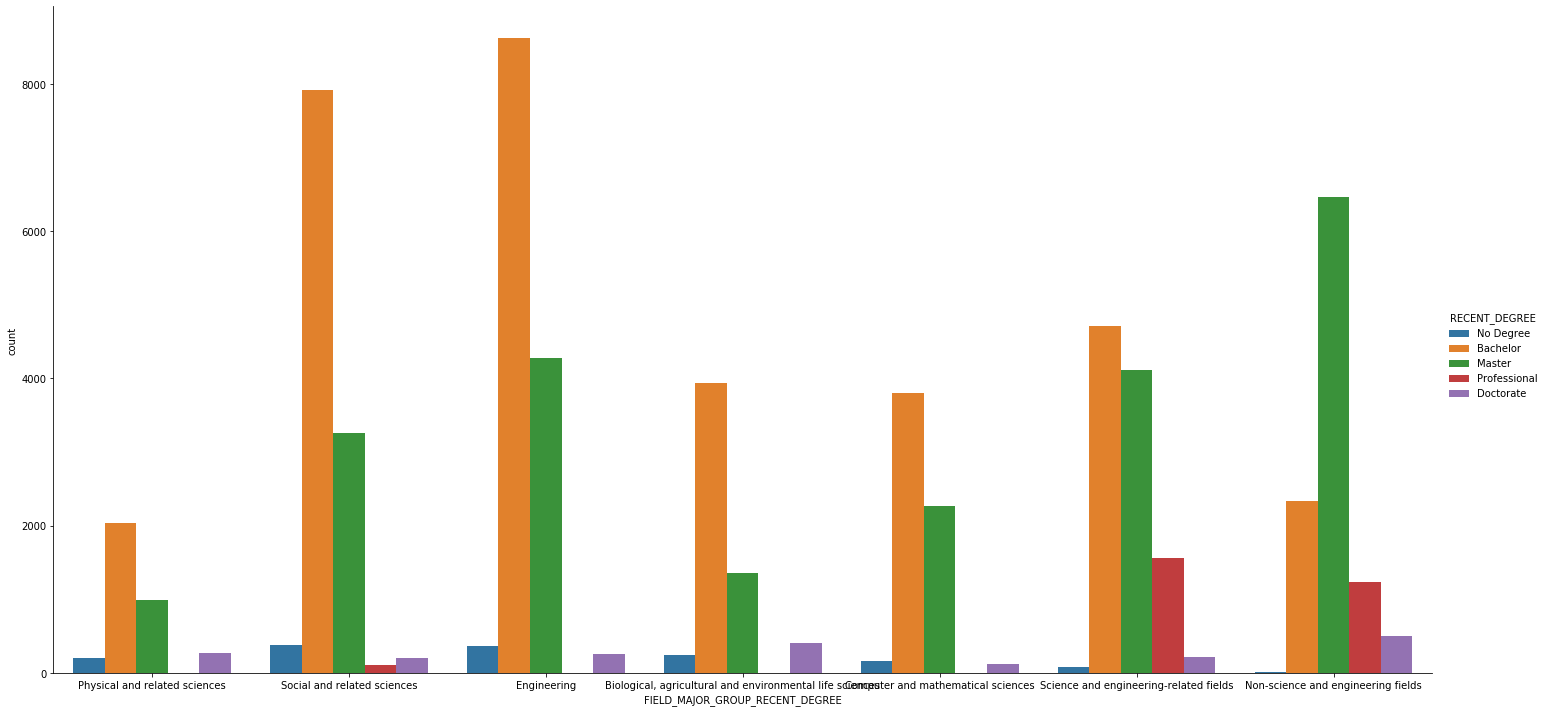

In [36]:
sns.catplot(x="FIELD_MAJOR_GROUP_RECENT_DEGREE", hue="RECENT_DEGREE",
               data=data, kind="count",
               height=10, aspect=2)

In [38]:
reasonnow = data.pivot_table(index=['REASON_EDUCATION_ADVANCE_OPPORTUNITIES','REASON_EDUCATION_BEFORE_CAREER','REASON_EDUCATION_CHANGE_CAREER','REASON_EDUCATION_PERSONAL'], values=['REFID'], aggfunc='count')

In [39]:
reasonnow.transpose()

REASON_EDUCATION_ADVANCE_OPPORTUNITIES     No                                    Yes                                    
REASON_EDUCATION_BEFORE_CAREER             No                Yes                  No                  Yes               
REASON_EDUCATION_CHANGE_CAREER             No       Yes       No       Yes        No       Yes         No       Yes     
REASON_EDUCATION_PERSONAL                  No  Yes   No Yes   No  Yes   No  Yes   No  Yes   No  Yes    No  Yes   No  Yes
REFID                                   55800  303  119  49  569  212  184  124  883  631  229  197  1048  867  584  574

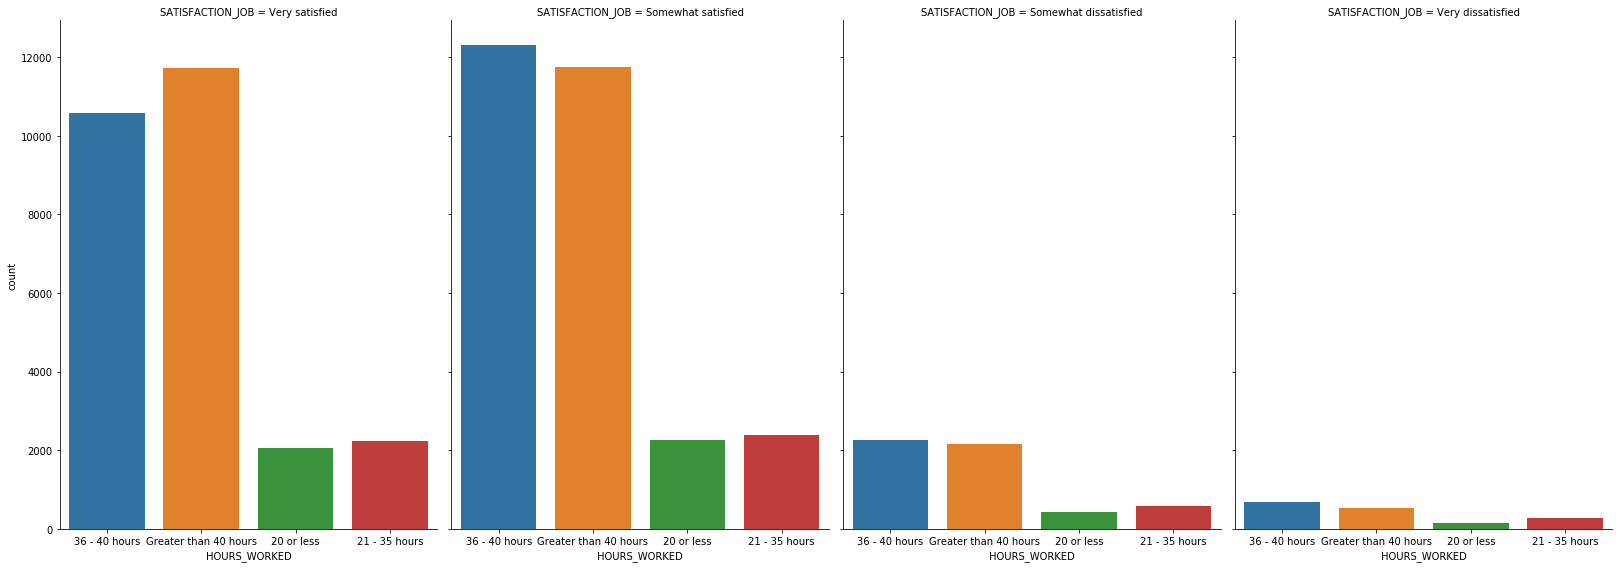

In [42]:
sns.catplot(x="HOURS_WORKED",  col="SATISFACTION_JOB",
               data=data, kind="count",
               height=8, aspect=.7)

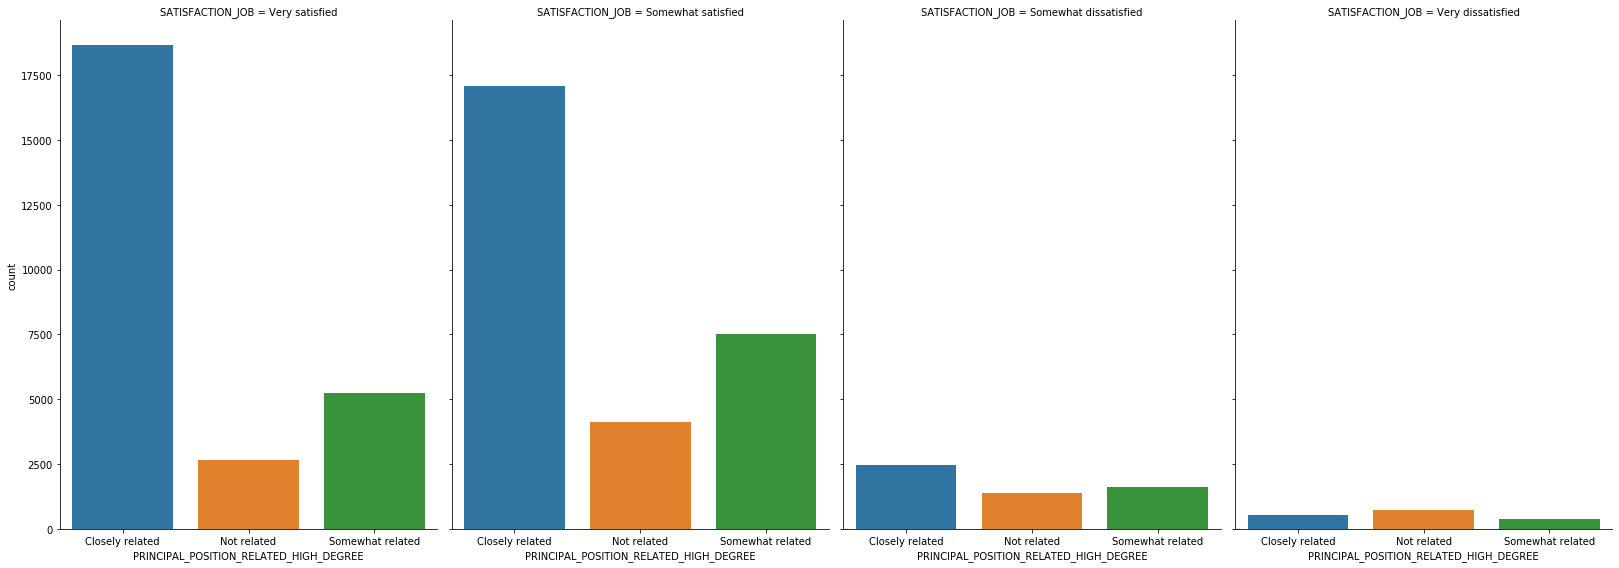

In [43]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="SATISFACTION_JOB",
               data=data, kind="count",
               height=8, aspect=.7)

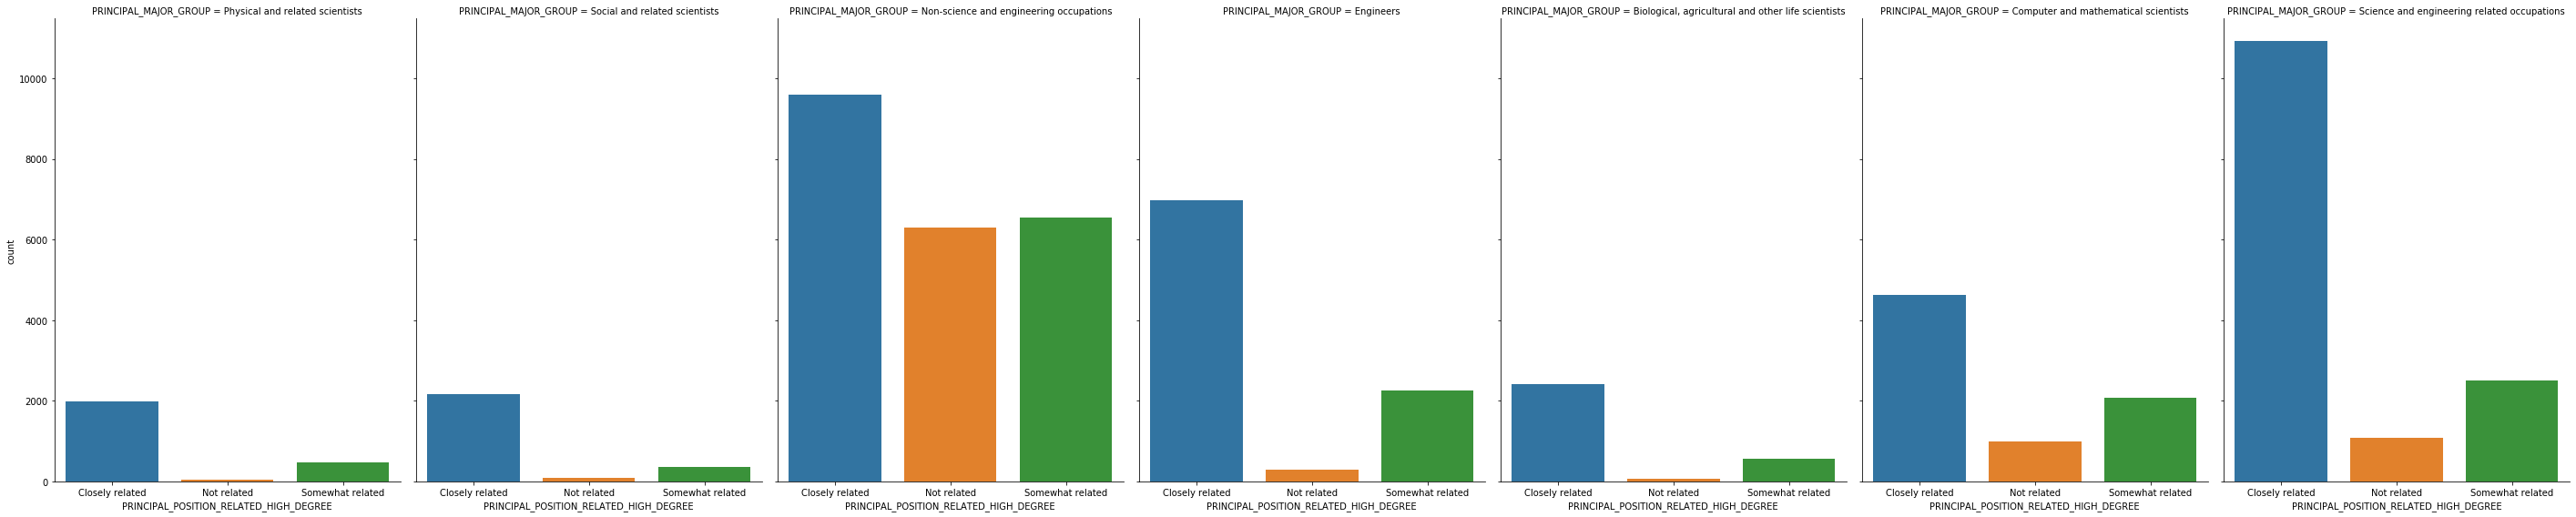

In [44]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="PRINCIPAL_MAJOR_GROUP",
               data=data, kind="count",
               height=8, aspect=.7)

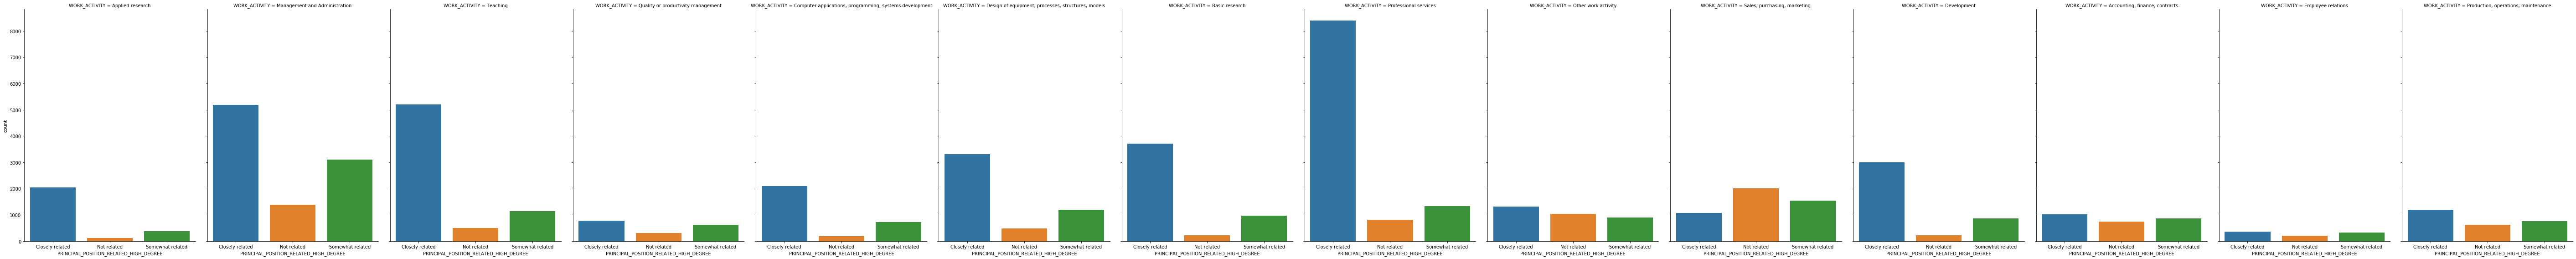

In [45]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="WORK_ACTIVITY",
               data=data, kind="count",
               height=8, aspect=.7)

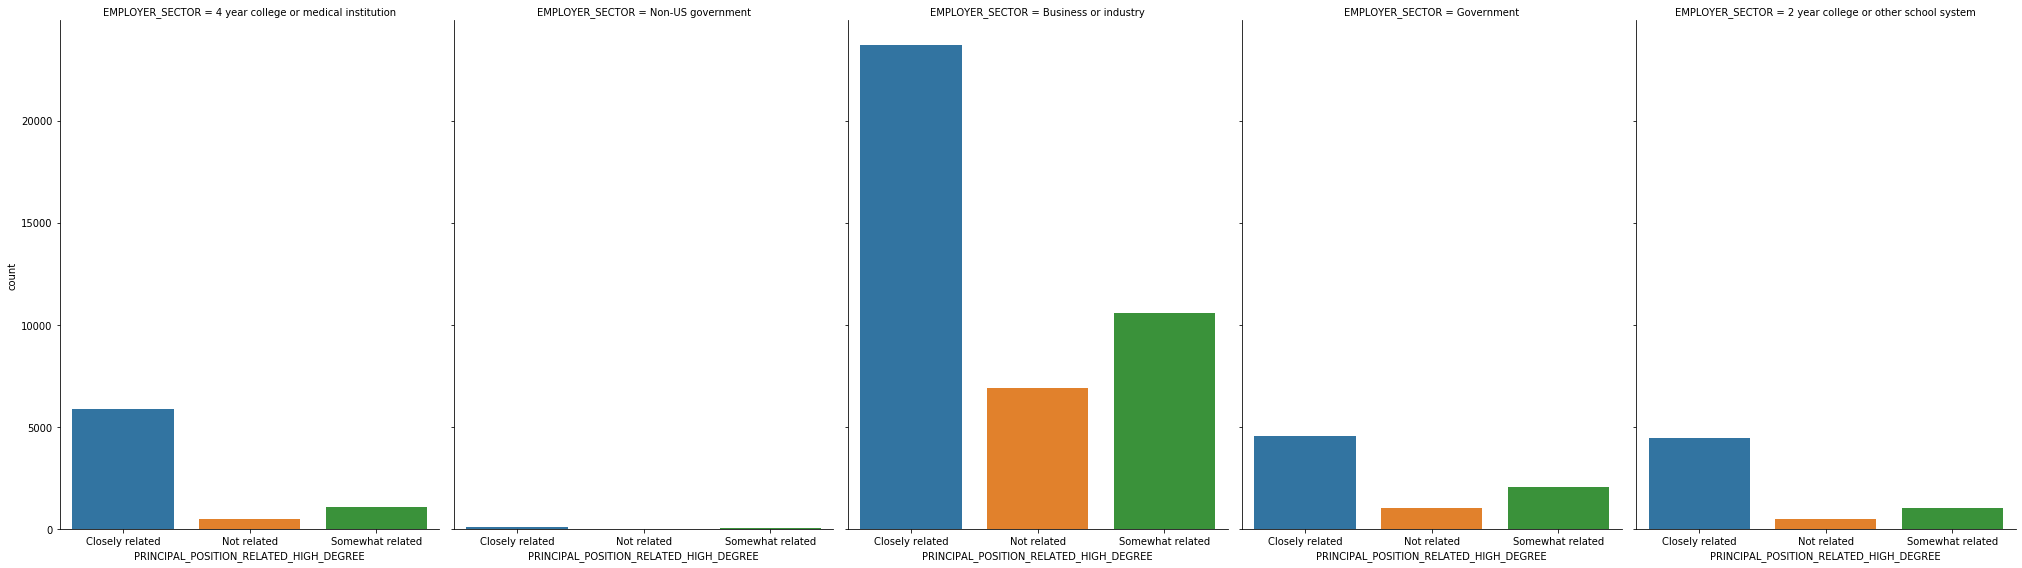

In [46]:
sns.catplot(x="PRINCIPAL_POSITION_RELATED_HIGH_DEGREE", col="EMPLOYER_SECTOR",
               data=data, kind="count",
               height=8, aspect=.7)

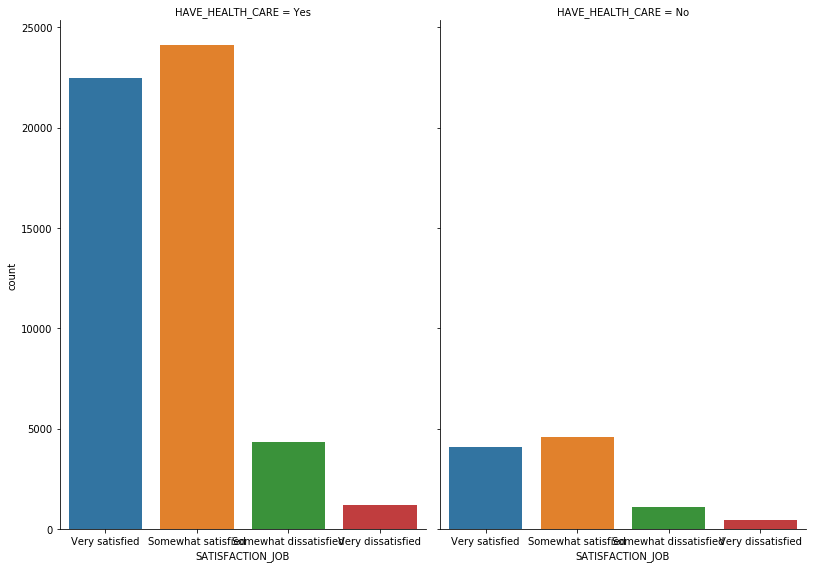

In [47]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_HEALTH_CARE",
               data=data, kind="count",
               height=8, aspect=.7)

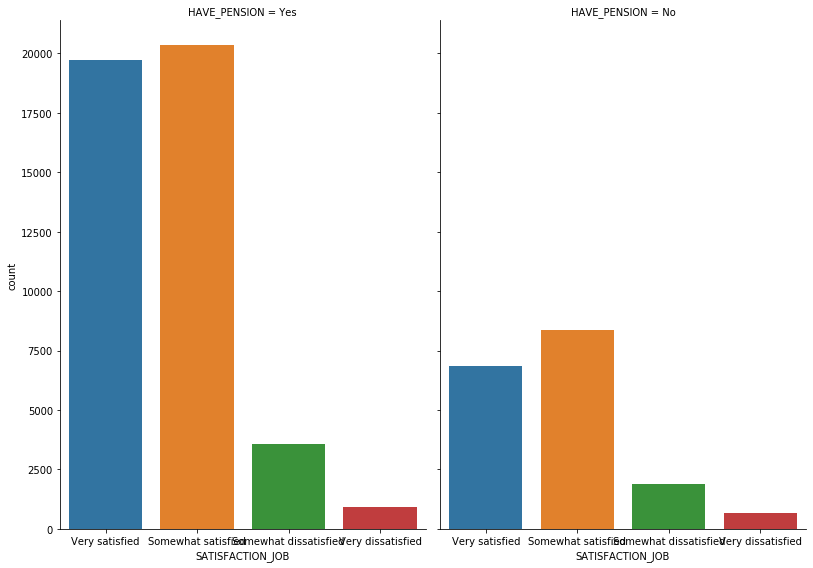

In [48]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_PENSION",
               data=data, kind="count",
               height=8, aspect=.7)

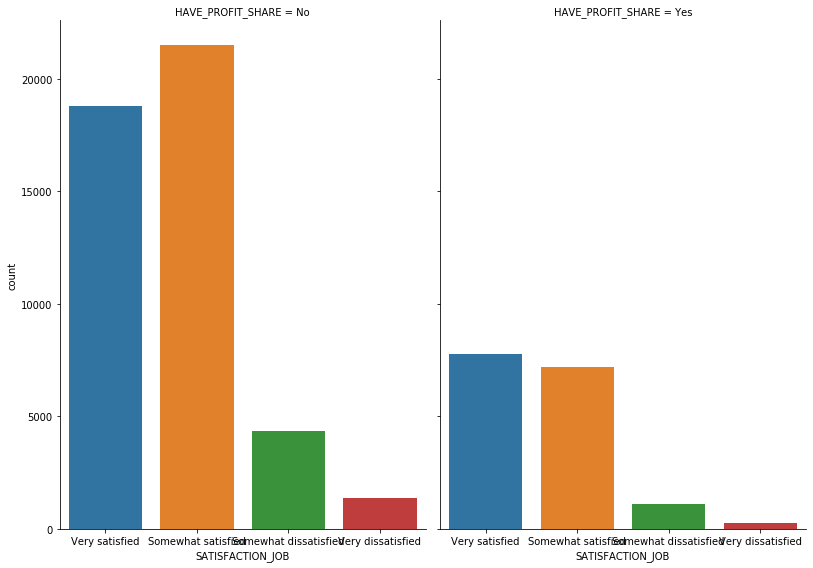

In [49]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_PROFIT_SHARE",
               data=data, kind="count",
               height=8, aspect=.7)

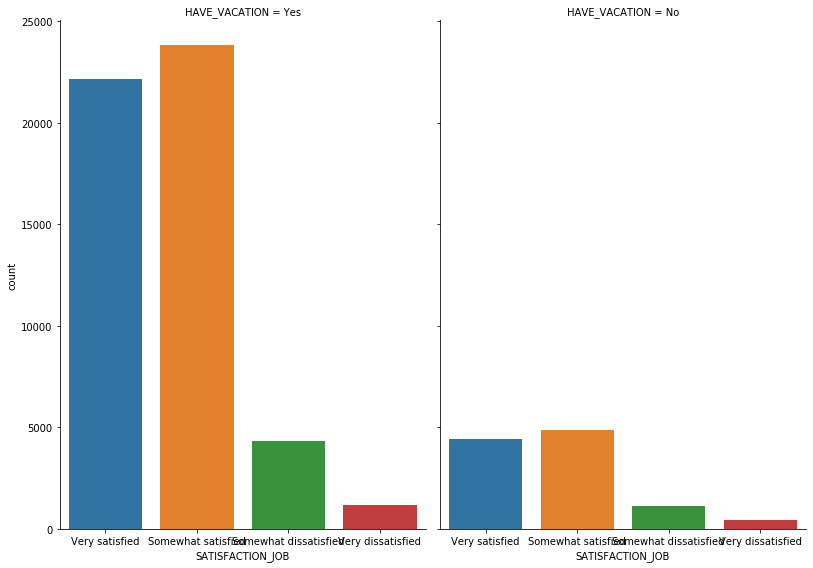

In [50]:
sns.catplot(x="SATISFACTION_JOB", col="HAVE_VACATION",
               data=data, kind="count",
               height=8, aspect=.7)

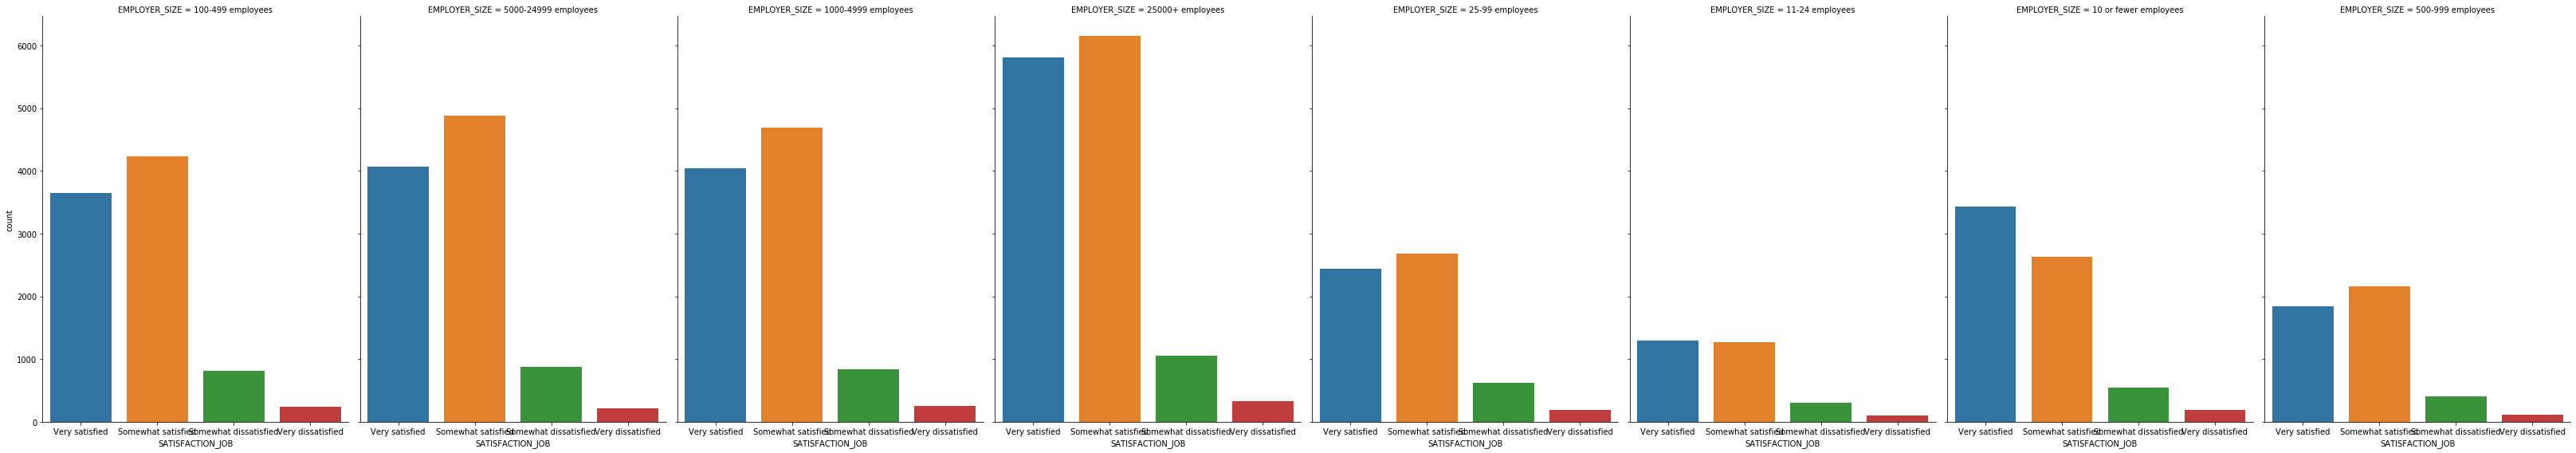

In [52]:
sns.catplot(x="SATISFACTION_JOB", col="EMPLOYER_SIZE",
               data=data, kind="count",
               height=8, aspect=.7)

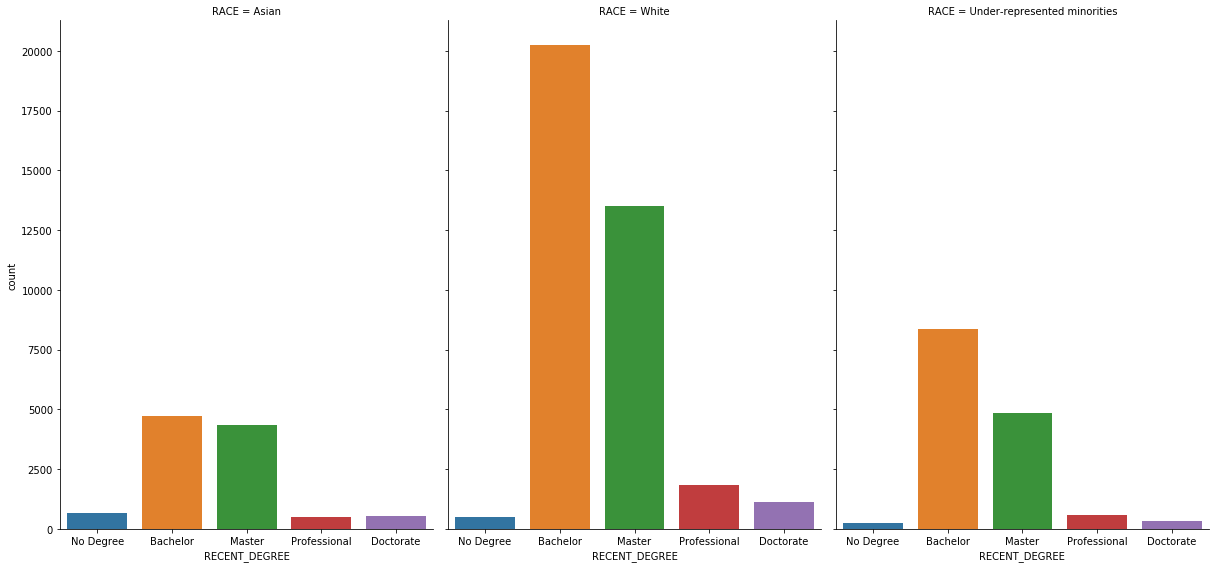

In [53]:
sns.catplot(x="RECENT_DEGREE", col="RACE",
               data=data, kind="count",
               height=8, aspect=.7)

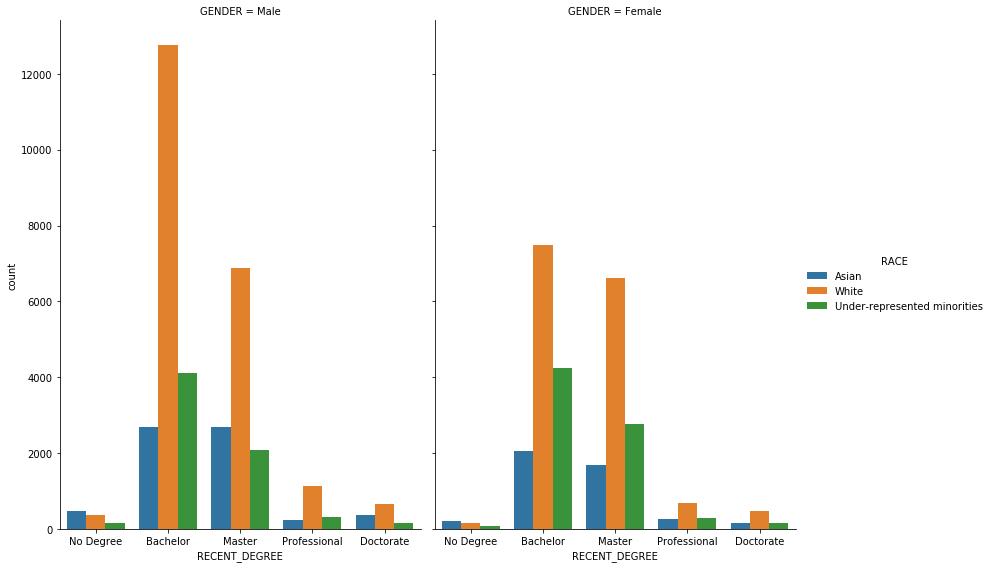

In [54]:
sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "RACE",
               data=data, kind="count",
               height=8, aspect=.7)

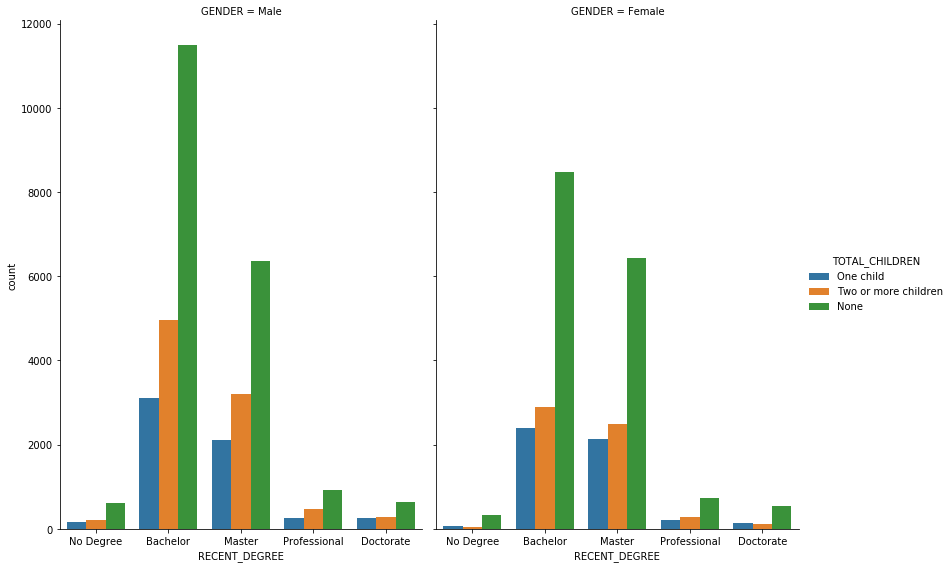

In [55]:
sns.catplot(x="RECENT_DEGREE", col="GENDER", hue = "TOTAL_CHILDREN",
               data=data, kind="count",
               height=8, aspect=.7)

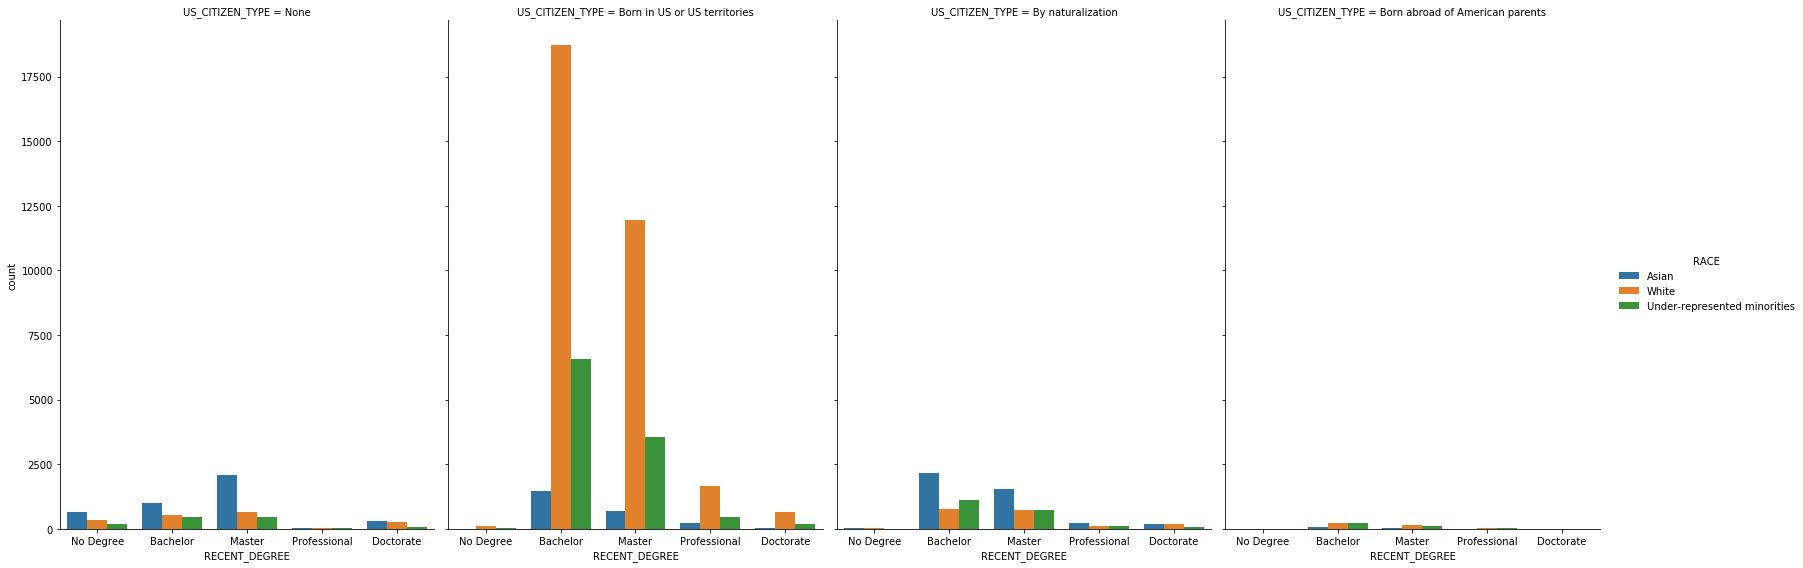

In [56]:
sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "RACE",
               data=data, kind="count",
               height=8, aspect=.7)

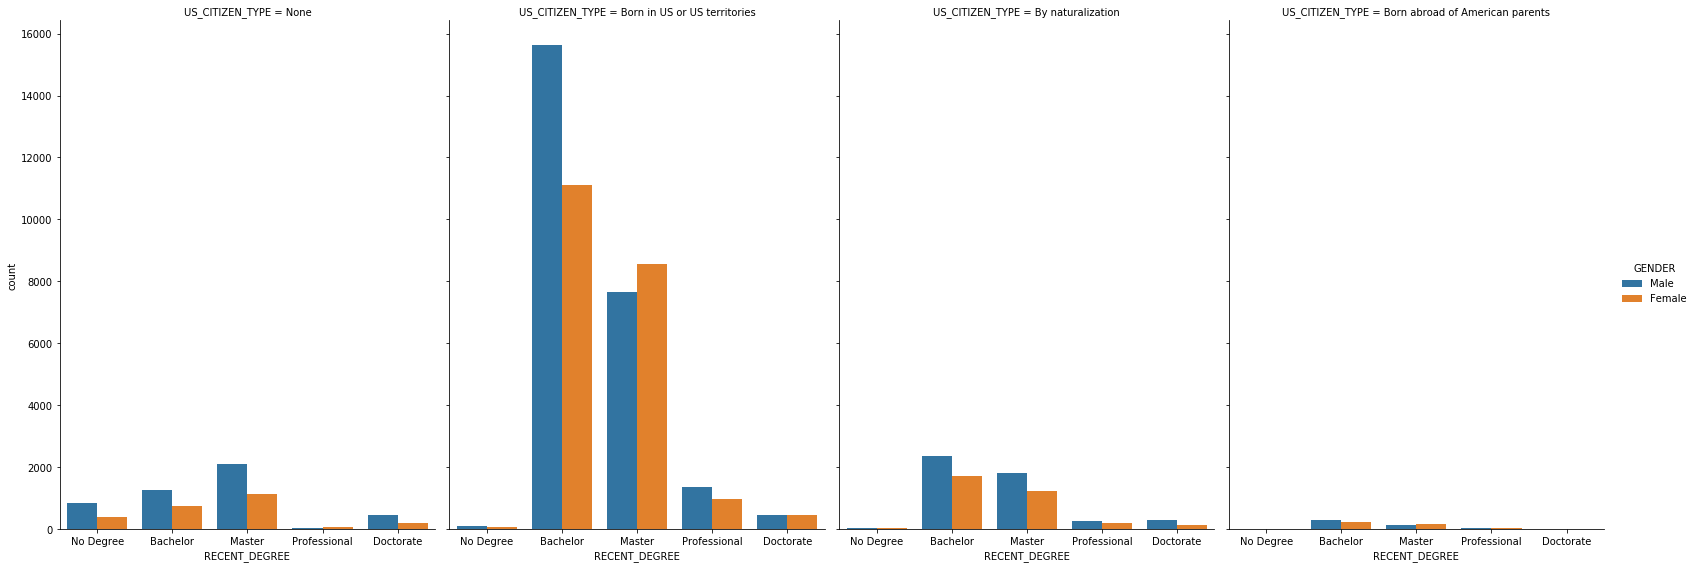

In [57]:
sns.catplot(x="RECENT_DEGREE", col="US_CITIZEN_TYPE", hue = "GENDER",
               data=data, kind="count",
               height=8, aspect=.7)

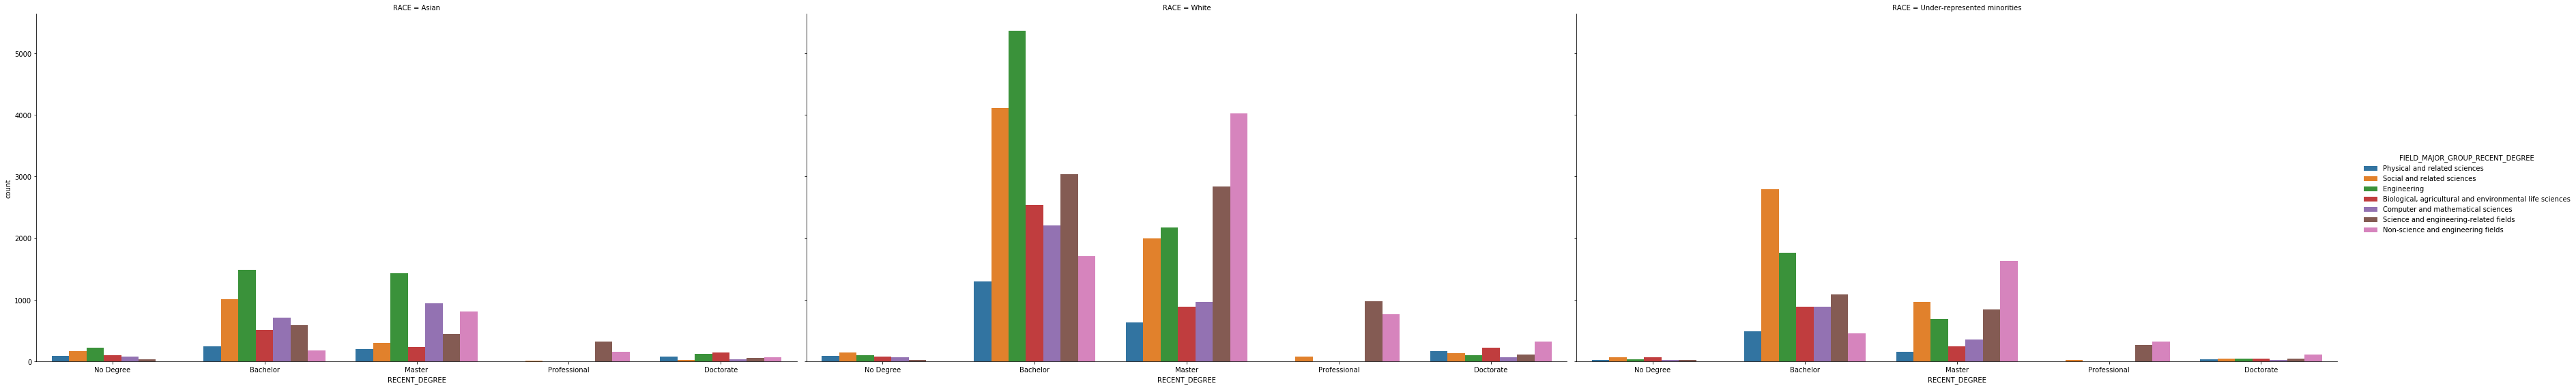

In [58]:
sns.catplot(x="RECENT_DEGREE", col = "RACE", hue = "FIELD_MAJOR_GROUP_RECENT_DEGREE",
               data=data, kind="count",
               height=8, aspect=2)

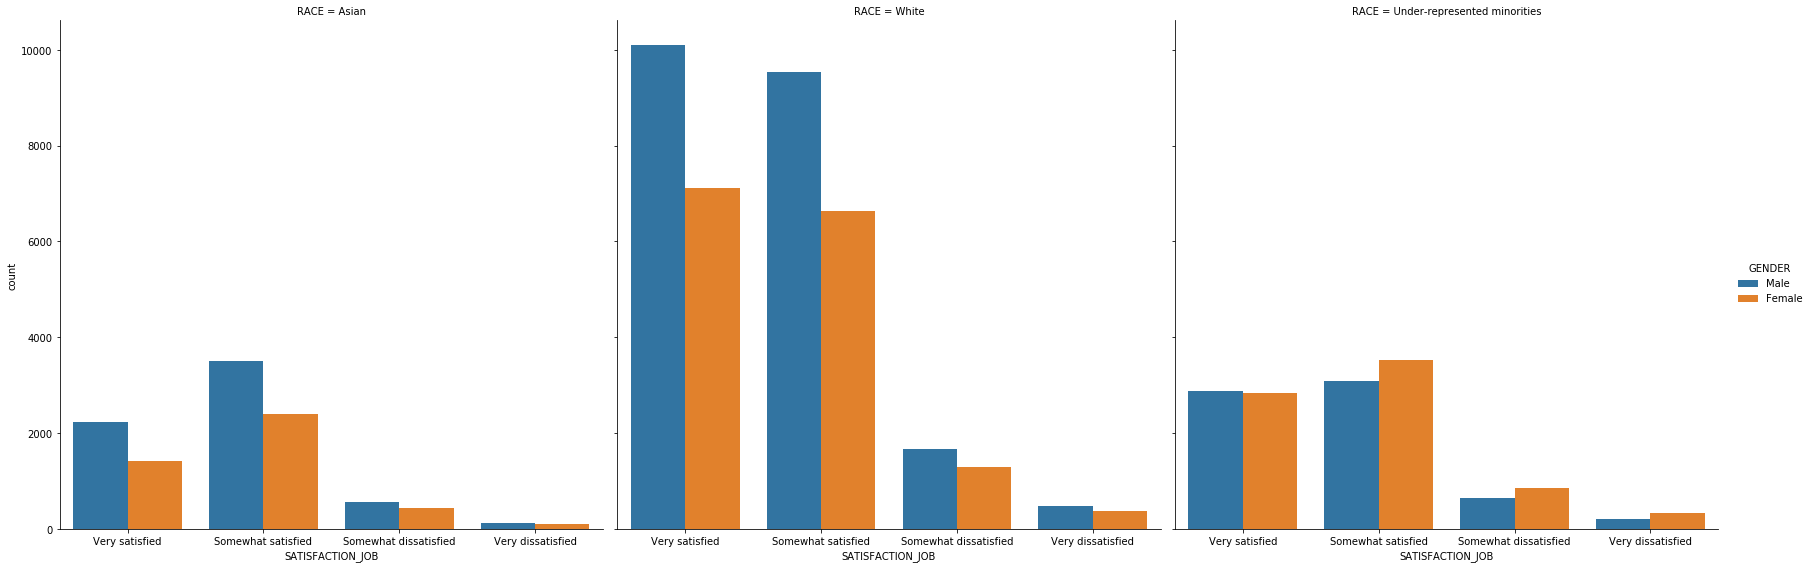

In [59]:
sns.catplot(x="SATISFACTION_JOB",  col= "RACE", hue = "GENDER",
               data=data, kind="count",
               height=8, aspect=1)

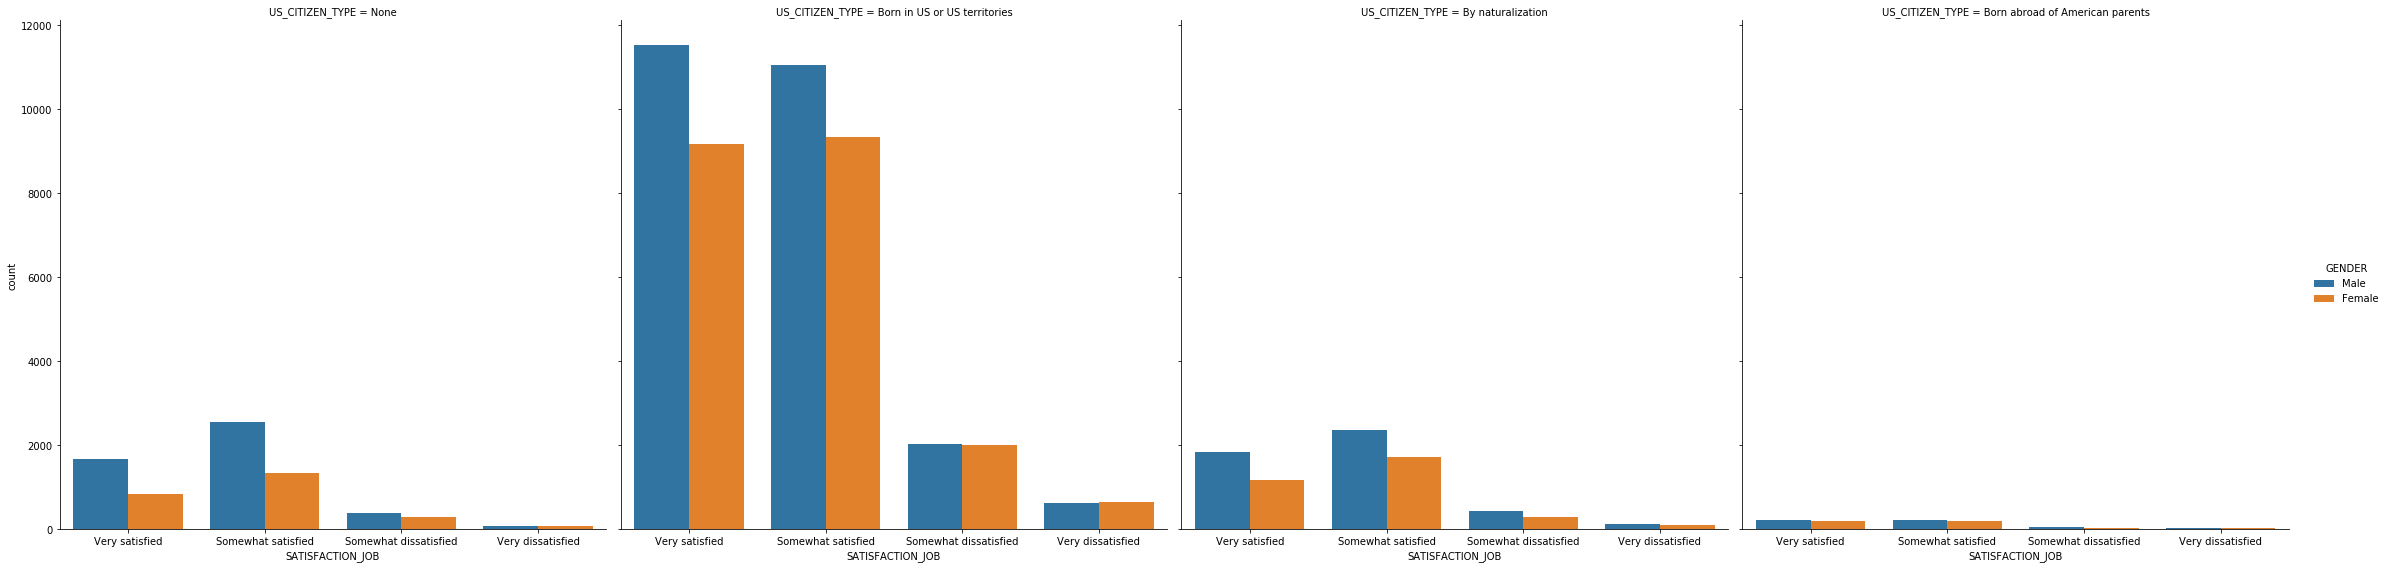

In [60]:
sns.catplot(x="SATISFACTION_JOB",  col= "US_CITIZEN_TYPE", hue = "GENDER",
               data=data, kind="count",
               height=8, aspect=1)